### Corona Virus Data Analyst 08 April 2020

Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several known coronaviruses are circulating in animals that have not yet infected humans. 

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness such as coughing and sneezing.

Resources : WHO

This data analysis is focused on data wrangling, data cleaning and data visulization of Corona Virus on 8th March 2020.

The dataset is derived from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE. 

Here is the link consisting of all datased regarding Coronavirus

https://github.com/CSSEGISandData/COVID-19

1 - Determine which libraries is used for dataset

In [12]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
from scipy.interpolate import make_interp_spline, BSpline
%matplotlib inline

2 - Load data from csv file defined in the link repository

In [13]:
corona_corfirm_file = "time_series_covid19_confirmed_global.csv"
corona_deaths_file = "time_series_covid19_deaths_global.csv"
corona_recovered_file = "time_series_covid19_recovered_global.csv"

url_time = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

corona_corfirm_time_data_df = pd.read_csv(url_time + corona_corfirm_file, error_bad_lines=False,encoding = "utf-8")
corona_deaths_time_data_df = pd.read_csv(url_time + corona_deaths_file, error_bad_lines=False,encoding = "utf-8")
corona_recovered_time_data_df = pd.read_csv(url_time + corona_recovered_file , error_bad_lines=False,encoding = "utf-8")

3 - Change Province/State to state and Country/Region to country

In [14]:
df_confirmed = corona_corfirm_time_data_df.rename(columns={"Province/State":"State","Country/Region": "Country"})
df_deaths = corona_deaths_time_data_df.rename(columns={"Province/State":"State","Country/Region": "Country"})
df_recovered = corona_recovered_time_data_df.rename(columns={"Province/State":"State","Country/Region": "Country"})

4 - Change country names

In [15]:
df_confirmed.loc[df_confirmed['Country'] == "US", "Country"] = "USA"
df_deaths.loc[df_deaths['Country'] == "US", "Country"] = "USA"
df_recovered.loc[df_recovered['Country'] == "US", "Country"] = "USA"

df_confirmed.loc[df_confirmed['Country'] == 'Korea, South', "Country"] = 'South Korea'
df_deaths.loc[df_deaths['Country'] == 'Korea, South', "Country"] = 'South Korea'
df_recovered.loc[df_recovered['Country'] == 'Korea, South', "Country"] = 'South Korea'

df_confirmed.loc[df_confirmed['Country'] == 'Taiwan*', "Country"] = 'Taiwan'
df_deaths.loc[df_deaths['Country'] == 'Taiwan*', "Country"] = 'Taiwan'
df_recovered.loc[df_recovered['Country'] == 'Taiwan*', "Country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['Country'] == 'Congo (Kinshasa)', "Country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['Country'] == 'Congo (Kinshasa)', "Country"] = 'Democratic Republic of the Congo'
df_recovered.loc[df_recovered['Country'] == 'Congo (Kinshasa)', "Country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['Country'] == "Reunion", "Country"] = "Réunion"
df_deaths.loc[df_deaths['Country'] == "Reunion", "Country"] = "Réunion"
df_recovered.loc[df_recovered['Country'] == "Reunion", "Country"] = "Réunion"

df_confirmed.loc[df_confirmed['Country'] == 'Congo (Brazzaville)', "Country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['Country'] == 'Congo (Brazzaville)', "Country"] = 'Republic of the Congo'
df_recovered.loc[df_recovered['Country'] == 'Congo (Brazzaville)', "Country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['Country'] == 'Bahamas, The', "Country"] = 'Bahamas'
df_deaths.loc[df_deaths['Country'] == 'Bahamas, The', "Country"] = 'Bahamas'
df_recovered.loc[df_recovered['Country'] == 'Bahamas, The', "Country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['Country'] == 'Gambia, The', "Country"] = 'Gambia'
df_deaths.loc[df_deaths['Country'] == 'Gambia, The', "Country"] = 'Gambia'
df_recovered.loc[df_recovered['Country'] == 'Gambia, The', "Country"] = 'Gambia'

5 - Replace Nan values to ''

In [16]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)
df_recovered = df_recovered.replace(np.nan, '', regex=True)

6 - Sum Values grpuped by Country and drop Lat and Long Column

In [17]:
df_confirmed = df_confirmed.groupby('Country').sum().drop(["Lat","Long"],axis =1)
df_deaths = df_deaths.groupby('Country').sum().drop(["Lat","Long"],axis =1)
df_recovered = df_recovered.groupby('Country').sum().drop(["Lat","Long"],axis =1)

7 - Sort values according to last date

In [18]:
df_confirmed = df_confirmed.sort_values(df_confirmed.columns[-1], ascending= False)
df_deaths = df_deaths.sort_values(df_deaths.columns[-1], ascending= False)
df_recovered = df_recovered.sort_values(df_recovered.columns[-1], ascending= False)

8 - Spread Comparison Graph

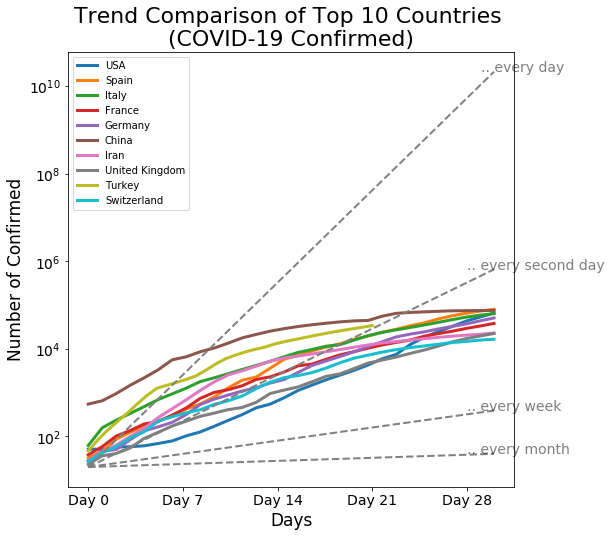

In [19]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)

threshold = 20

for i,country in enumerate(df_confirmed.index):
    if i >= 10:
        break
    x = 31
    t = df_confirmed.loc[df_confirmed.index== country].values[0]
    t = t[t>threshold][:x]
    
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth, linestyle = 'solid',label = country,linewidth =3, markevery=[-1])
    
plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     


# Reference lines 
x = np.arange(0,31)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,31)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every second day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,31)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,31)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed",fontsize=17)
plt.title("Trend Comparison of Top 10 Countries \n(COVID-19 Confirmed)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.savefig('images/confirmed.png')
plt.savefig('images/confirmed.pdf')

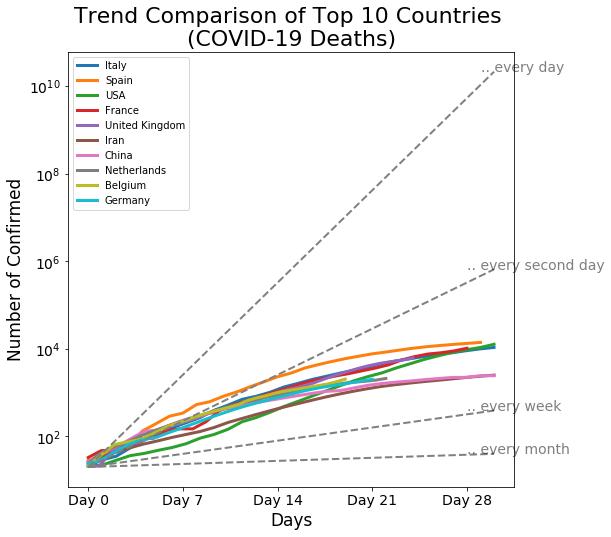

In [20]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)

threshold = 20

for i,country in enumerate(df_deaths.index):
    if i >= 10:
        break
    x = 31
    t = df_deaths.loc[df_deaths.index== country].values[0]
    t = t[t>threshold][:x]
    
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth, linestyle= 'solid',label = country,linewidth =3, markevery=[-1])
    
plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     


# Reference lines 
x = np.arange(0,31)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,31)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every second day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,31)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,31)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed",fontsize=17)
plt.title("Trend Comparison of Top 10 Countries \n(COVID-19 Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.savefig('images/deaths.png')
plt.savefig('images/deaths.pdf')

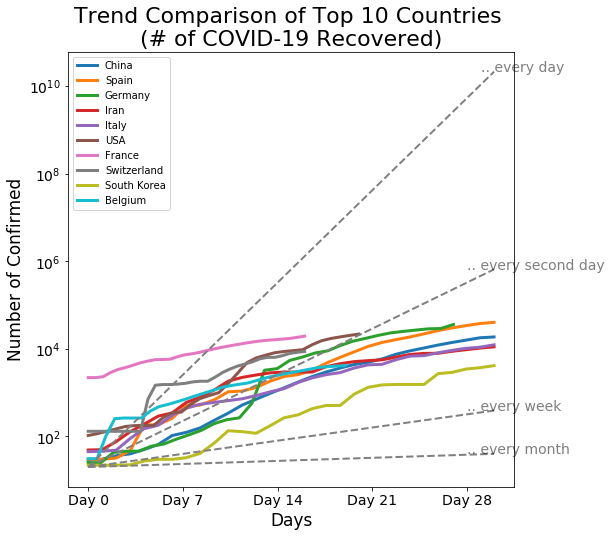

In [21]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)

threshold = 20

for i,country in enumerate(df_recovered.index):
    if i >= 10:
        break
    x = 31
    t = df_recovered.loc[df_recovered.index== country].values[0]
    t = t[t>threshold][:x]
    
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth, linestyle = 'solid',label = country,linewidth =3, markevery=[-1])
    
plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     


# Reference lines 
x = np.arange(0,31)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,31)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every second day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,31)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,31)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed",fontsize=17)
plt.title("Trend Comparison of Top 10 Countries \n(# of COVID-19 Recovered)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.savefig('images/recovered.png')
plt.savefig('images/recovered.pdf')

In [22]:
# total = sum(i for i in range(1,82))
# total